In [1]:
import ctypes
import numpy as np
import matplotlib.pyplot as plt
from script.plotDisplayLinear import plotDisplay

In [2]:
linear_model = ctypes.CDLL("modele/linear/target/release/liblinear_classification.so")

linear_model.LM_init.argtypes = [
    ctypes.c_double,
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    ctypes.c_size_t,
    ctypes.c_double,
    ctypes.c_char
]
linear_model.LM_init.restype = ctypes.POINTER(ctypes.c_void_p)

linear_model.LM_free.argtypes = [ctypes.POINTER(ctypes.c_void_p)]

linear_model.LM_train.argtypes = [
    ctypes.POINTER(ctypes.c_void_p),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    ctypes.c_size_t,
    ctypes.c_size_t,
    ctypes.c_size_t
]

linear_model.LM_predict.argtypes = [
    ctypes.POINTER(ctypes.c_void_p),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    ctypes.c_size_t,
    ctypes.c_size_t,
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
]

## Xor test

### Parameters

In [3]:
learning_rate = 0.001
weights = np.array([0.1, -0.2, 0.3, -0.4], dtype=np.float64, order='C')
bias = 0.1
epochs = 1000000
activation = b't'
# Initialisation du modèle
model = linear_model.LM_init(learning_rate, weights, weights.size, bias, activation)

flatten vector [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]


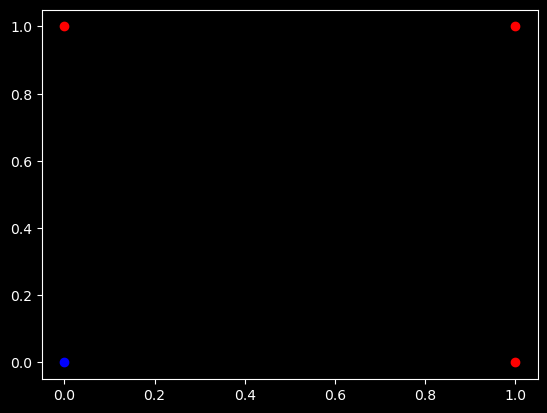

<Figure size 640x480 with 0 Axes>

In [4]:
# XOR test

x_train = np.array([
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0],
], dtype=np.float64)
x_train_flatten = x_train.flatten()
y_train = np.array([-1.0, 1.0, 1.0, -1.0], dtype=np.float64, order='C')
n_samples, n_features = 4, 1
# n_samples, n_features = x_train.shape[0], x_train.shape[1]

print(f"flatten vector {x_train}")
plt.scatter(x_train[0, 0], x_train[0, 1], color='blue')
plt.scatter(x_train[1:4,0], x_train[1:4,1], color='red')
plt.show()
plt.clf()

In [5]:
linear_model.LM_train(model, x_train_flatten, y_train, n_samples, n_features, epochs)

vector x : [[0.0], [0.0], [0.0], [1.0]]
vector y : [-1.0, 1.0, 1.0, -1.0]
Training completed


0

In [6]:
predictions = np.zeros(n_samples, dtype=np.float64)

linear_model.LM_predict(
    model,
    x_train_flatten,
    n_samples,
    n_features,
    predictions
)

print("---------------")
print(predictions)
print("---------------")




---------------
[-0.42 -0.42 -0.42 -0.42]
---------------
vector x : [0.0, 0.0, 0.0, 1.0]
samples : 4
features : 1
vector x converted : [[0.0], [0.0], [0.0], [1.0]]


In [7]:
linear_model.LM_free(model)

0

## simple linear test

In [8]:
learning_rate = 0.01
weights = np.array([0.1, -0.2, 0.3, -0.4], dtype=np.float64, order='C')
bias = 0.5
epochs = 1000000
activation = b't'
# Initialisation du modèle
model = linear_model.LM_init(learning_rate, weights, weights.size, bias, activation)

In [9]:
x_train = np.array([
    [1.0, 1.0],
    [2.0, 3.0],
    [3.0, 3.0]
], dtype=np.float64)
x_train_flatten = x_train.flatten()
y_train = np.array([1.0, -1.0, -1.0], dtype=np.float64, order='C')
n_samples, n_features = 3, 2

print(f"flatten vector {x_train}")
# plt.scatter(x_train[0, 0], x_train[0, 1], color='blue')
# plt.scatter(x_train[1:4,0], x_train[1:4,1], color='red')
# plt.show()
# plt.clf()

flatten vector [[1. 1.]
 [2. 3.]
 [3. 3.]]


In [10]:
linear_model.LM_train(model, x_train_flatten, y_train, n_samples, n_features, epochs)

vector x : [[1.0, 1.0], [2.0, 3.0], [3.0, 3.0]]
vector y : [1.0, -1.0, -1.0]
Training completed


0

In [11]:
n_samples_new = x_train.shape[0]
predictions = np.zeros(n_samples_new, dtype=np.float64)

linear_model.LM_predict(
    model,
    x_train_flatten,
    n_samples_new,
    n_features,
    predictions
)

print(predictions)

# y_train = y_train.reshape(-1, 1)

# plotDisplay(x_train, y_train, model, linear_model, n_features)

[-0.42 -0.42 -0.42]
vector x : [1.0, 1.0, 2.0, 3.0, 3.0, 3.0]
samples : 3
features : 2
vector x converted : [[1.0, 1.0], [2.0, 3.0], [3.0, 3.0]]


In [12]:
linear_model.LM_free(model)

0

# test nuage point 

In [13]:
learning_rate = 0.01
weights = np.array([0.1, -0.4, 0.6, -0.24], dtype=np.float64, order='C')
bias = 0.2
epochs = 1000000
activation = b't'
n_samples, n_features = 100, 2
# Initialisation du modèle
model = linear_model.LM_init(learning_rate, weights, weights.size, bias, activation)

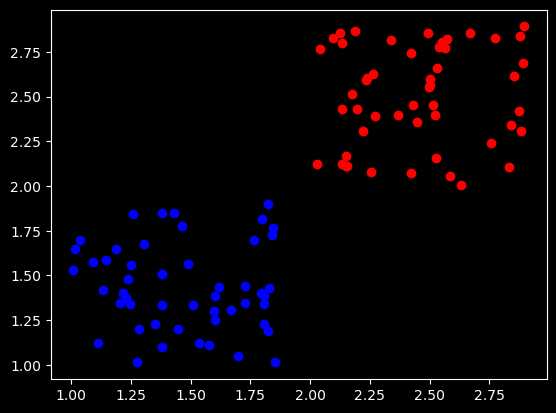

<Figure size 640x480 with 0 Axes>

In [14]:
x_train = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
x_train_flatten = x_train.flatten()
y_train = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0]).flatten()
# print(y_train)
plt.scatter(x_train[0:50, 0], x_train[0:50, 1], color='blue')
plt.scatter(x_train[50:100,0], x_train[50:100,1], color='red')
plt.show()
plt.clf()

In [15]:
linear_model.LM_train(model, x_train_flatten, y_train, n_samples, n_features, epochs)

vector x : [[1.5086577463284057, 1.3333035711626113], [1.2182808330077994, 1.4024221460253758], [1.4312971277785356, 1.8482646726731264], [1.8271469405696306, 1.4291097189733888], [1.8251366004712064, 1.8985163165237455], [1.2034190200750436, 1.3436691397575997], [1.5982774616672826, 1.2991143547246937], [1.6011334003168116, 1.3863525315387224], [1.8541884282213545, 1.012844624125693], [1.7995096410396734, 1.813640041645968], [1.1461019156605063, 1.5851394459223989], [1.2762252547567812, 1.0173114843772884], [1.2305220469865676, 1.3749739503570533], [1.841122760182024, 1.7265252194412106], [1.2476620915188676, 1.340459040070994], [1.091044661506809, 1.57571815588563], [1.8434779424334844, 1.7635169260785297], [1.447135399792735, 1.2025383519182056], [1.0364185259796586, 1.6959513096396597], [1.3783588045135056, 1.3318307175939117], [1.6993141646839505, 1.046753186752468], [1.7257849103778937, 1.3455639150791494], [1.282347183222686, 1.2005766886054499], [1.0162363726647432, 1.647038724

0

In [16]:
n_samples_new = x_train.shape[0]
predictions = np.zeros(n_samples_new, dtype=np.float64)

linear_model.LM_predict(
    model,
    x_train_flatten,
    n_samples_new,
    n_features,
    predictions
)
print("---------------------------------------------------------------")
print(predictions)
print("---------------------------------------------------------------")

vector x : [1.5086577463284057, 1.3333035711626113, 1.2182808330077994, 1.4024221460253758, 1.4312971277785356, 1.8482646726731264, 1.8271469405696306, 1.4291097189733888, 1.8251366004712064, 1.8985163165237455, 1.2034190200750436, 1.3436691397575997, 1.5982774616672826, 1.2991143547246937, 1.6011334003168116, 1.3863525315387224, 1.8541884282213545, 1.012844624125693, 1.7995096410396734, 1.813640041645968, 1.1461019156605063, 1.5851394459223989, 1.2762252547567812, 1.0173114843772884, 1.2305220469865676, 1.3749739503570533, 1.841122760182024, 1.7265252194412106, 1.2476620915188676, 1.340459040070994, 1.091044661506809, 1.57571815588563, 1.8434779424334844, 1.7635169260785297, 1.447135399792735, 1.2025383519182056, 1.0364185259796586, 1.6959513096396597, 1.3783588045135056, 1.3318307175939117, 1.6993141646839505, 1.046753186752468, 1.7257849103778937, 1.3455639150791494, 1.282347183222686, 1.2005766886054499, 1.0162363726647432, 1.6470387240796547, 1.2374210657755829, 1.4794431825911556

In [17]:
linear_model.LM_free(model)

0